In [10]:
# llibreries utilitzades
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree, datasets, neighbors
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc
import time
import warnings
warnings.filterwarnings("ignore")

sns.set(style="darkgrid")
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Base de dades utilitzada: Iris

Models implementats: Regressor Logístic, SVM, Desicion tree, Random Forest i KNN

In [2]:
# import de la base de dades
iris = datasets.load_iris()
iris_d = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

iris_d.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.100,3.500,1.400,0.200,0.000
1,4.900,3.000,1.400,0.200,0.000
2,4.700,3.200,1.300,0.200,0.000
3,4.600,3.100,1.500,0.200,0.000
4,5.000,3.600,1.400,0.200,0.000


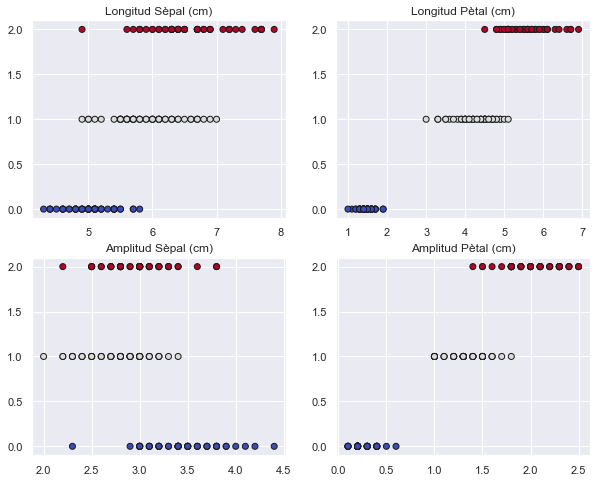

In [3]:
# atributs utilitzada

X = iris.data[:, :4]
y = iris.target

# plot de la base de dades que s'utilitza
fig, sub = plt.subplots(2, 2, figsize=(10,8))

sub[0,0].scatter(X[:,0], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k') # long sepalo
sub[0,0].set_title('Longitud Sèpal (cm)')
sub[1,0].scatter(X[:,1], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k') # amp sepalo
sub[1,0].set_title('Amplitud Sèpal (cm)')
sub[0,1].scatter(X[:,2], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k') # long petal
sub[0,1].set_title('Longitud Pètal (cm)')
sub[1,1].scatter(X[:,3], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k') # amp petal
sub[1,1].set_title('Amplitud Pètal (cm)')

plt.savefig("attrs_iris.png", dpi = 300, bbox_inches = 'tight')
#plt.savefig("visu_iris1.png", dpi = 300, bbox_inches = 'tight')

Visualització

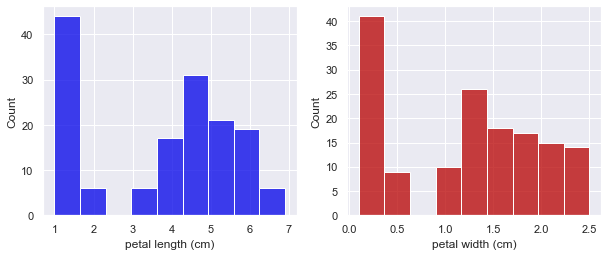

In [4]:
#histograma amb els atributs més importants de l'Iris com a Gaussiana

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(top=0.85)
sl=sns.histplot(data=iris_d, x="petal length (cm)", color="#0000e9", ax=axs[0])
sw=sns.histplot(data=iris_d, x="petal width (cm)", color="#b80000", ax=axs[1])

plt.savefig("hist_count_iris.png", dpi = 300, bbox_inches = 'tight')

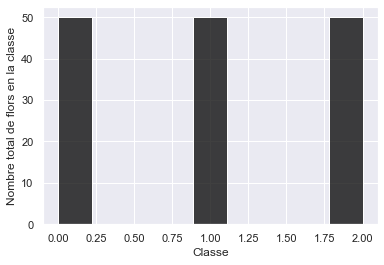

In [11]:
# histograma de la target 

p=sns.histplot(data=iris_d, x="target", kde=False, color="black")

p.set_xlabel("Classe")
p.set_ylabel("Nombre total de flors en la classe")

plt.savefig("hist_target.png", dpi = 300, bbox_inches = 'tight')

 Visualitzacio de la matriu de covariancia

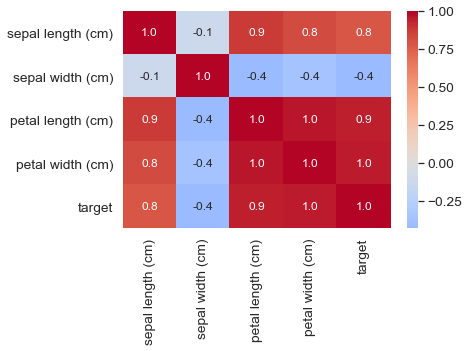

In [12]:
plt.figure() #figsize=(10,10)

sns.set(font_scale=1.25)
sns.heatmap(iris_d.corr(), cbar=True, annot=True, square=False, fmt='.1f', cmap=plt.cm.coolwarm, 
                 center=0, annot_kws={'size': 12}, yticklabels=list(iris_d), xticklabels=list(iris_d))

plt.show()
#plt.savefig("corrIris.png", dpi = 300, bbox_inches = 'tight')

In [13]:
# parametres for the logistic regressor and the svm
n_classes = 3
sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

### Models 

In [14]:
# funcio del fit del regressor logistic
def fit_lr(X, y, part = 0.6):
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001) 
    logireg.fit(x_t, y_t)
    probs = logireg.predict_proba(x_v)
    return logireg.score(x_v, y_v), probs, y_v

# funcio del fit del svm
def fit_svm(X, y, part = 0.6, k = 'linear', C = 10.0, g = 0.9):
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    svc = svm.SVC(C=C, kernel=k, gamma=g, probability=True) # creem el regresor svm    
    svc.fit(x_t, y_t) 
    probs = svc.predict_proba(x_v) # s usa en el precision recall curve
    return svc.score(x_v, y_v), probs, y_v

# funcio del decision tree
def decision_tree_fit(X, y, part = 0.6):
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    dt = tree.DecisionTreeClassifier()
    dt.fit(x_t, y_t)
    probs = dt.predict_proba(x_v)
    y_pred=dt.predict(x_v)
    return metrics.accuracy_score(y_v, y_pred), probs, y_v

# funcio del random forest
def fit_rf(i,X, y, part = 0.6):
    
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(x_t,y_t)
    probs = clf.predict_proba(x_v)
    y_pred=clf.predict(x_v)
    return metrics.accuracy_score(y_v, y_pred),probs,y_v

# funcio del KNN
def fit_KNN(X, y, part = 0.6, n =7):
    
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_t,y_t)
    probs = clf.predict_proba(x_v)
    y_pred=clf.predict(x_v)
    return metrics.accuracy_score(y_v, y_pred), probs, y_v

Comparativa de models

In [15]:
# matriu de precisions dels diferents models

acc_r=np.zeros((10,5))
for i in range(10): 
    acc_r[i][0],*_ = fit_KNN(X, y)
    acc_r[i][1],*_ = fit_rf(15,X, y)
    acc_r[i][2],*_ = decision_tree_fit(X, y)
    acc_r[i][3],*_ = fit_svm(X, y, part = 0.6)
    acc_r[i][4],*_ = fit_lr(X, y, part = 0.6)
    

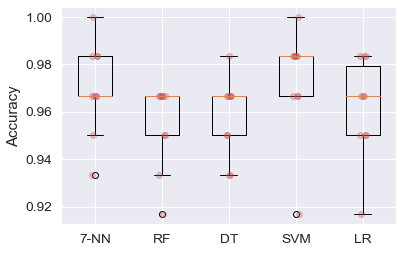

In [16]:
# accuracy boxplot
plt.boxplot(acc_r);
for i in range(5):
    xderiv = (i+1)*np.ones(acc_r[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc_r[:,i],'ro',alpha=0.3)
    
ax = plt.gca()
ax.set_xticklabels(['7-NN','RF','DT','SVM', 'LR'])
plt.ylabel('Accuracy')
plt.savefig("boxplot_sad.png",dpi=300, bbox_inches='tight')

Temps d'execució de cada model

In [17]:
begin = time.time()
fit_KNN(X, y)
end = time.time()
print("El temps d'execució del KNN ha estat",end-begin,"segons.")

El temps d'execució del KNN ha estat 0.011254072189331055 segons.


In [18]:
begin = time.time()
fit_rf(15,X, y)
end = time.time()
print("El temps d'execució del Random Forest ha estat",end-begin,"segons.")

El temps d'execució del Random Forest ha estat 0.03593182563781738 segons.


In [19]:
begin = time.time()
decision_tree_fit(X, y)
end = time.time()
print("El temps d'execució del Decision Tree ha estat",end-begin,"segons.")

El temps d'execució del Decision Tree ha estat 0.003118753433227539 segons.


In [20]:
begin = time.time()
fit_svm(X, y, part = 0.6)
end = time.time()
print("El temps d'execució del SVM ha estat",end-begin,"segons.")

El temps d'execució del SVM ha estat 0.003989219665527344 segons.


In [21]:
begin = time.time()
fit_lr(X, y, part = 0.6)
end = time.time()
print("El temps d'execució del Rgressor Logístic ha estat",end-begin,"segons.")

El temps d'execució del Rgressor Logístic ha estat 0.03829646110534668 segons.


Proves del KNN donat diferents Ns

In [22]:
acc_10NN,*_ = fit_KNN(X, y,0.6,10)
acc_10NN

0.9666666666666667

In [23]:
acc_15NN,*_ = fit_KNN(X, y,0.6,15)
acc_15NN

0.9666666666666667

In [24]:
acc_20NN,*_ = fit_KNN(X, y,0.6,20)
acc_20NN

0.9

Proves del SVM utilitzant diferents nuclis

In [25]:
acc_poly,*_ = fit_svm(X, y, part=0.6, k='poly')
acc_poly

0.9666666666666667

In [26]:
acc_rbf,*_ = fit_svm(X, y, part=0.6, k='rbf')
acc_rbf

0.9333333333333333

In [27]:
acc_sigmoid,*_ = fit_svm(X, y, part=0.6, k='sigmoid')
acc_sigmoid

0.31666666666666665

In [28]:
acc_linear,*_ = fit_svm(X, y, part=0.6)
acc_linear

0.9666666666666667

### Corbes de precisió

In [29]:
def recall_curve(probs, y_v):
    precision = {}
    recall = {}
    average_precision = {}
    plt.figure()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
        average_precision[i] = average_precision_score(y_v == i, probs[:, i])

        plt.plot(recall[i], precision[i],
        label='Precision-recall curve of class {0} (area = {1:0.2f})'
                               ''.format(i, average_precision[i]))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc="upper right")

Regressor logístic

<Figure size 432x288 with 0 Axes>

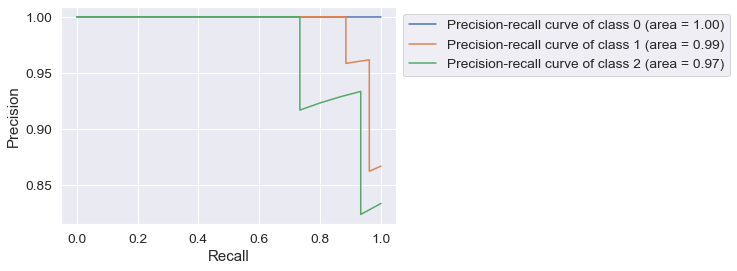

In [31]:
_,probs, y_v = fit_lr(X, y, part = 0.6)

fig = plt.figure()
recall_curve(probs, y_v)
plt.legend(bbox_to_anchor =(1, 1), ncol = 1)
plt.savefig("pr_rl.png", dpi = 300, bbox_inches = 'tight')

SVM

<Figure size 432x288 with 0 Axes>

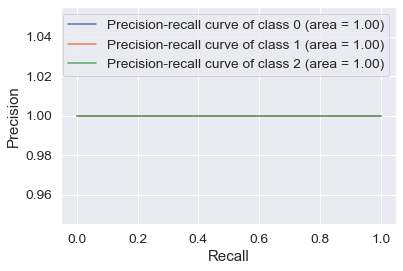

In [32]:
_,probs, y_v = fit_svm(X, y, part = 0.6)

fig = plt.figure()
recall_curve(probs, y_v)
plt.legend(bbox_to_anchor =(1, 1), ncol = 1)
plt.savefig("pr_svm.png", dpi = 300, bbox_inches = 'tight')

Decision tree

<Figure size 432x288 with 0 Axes>

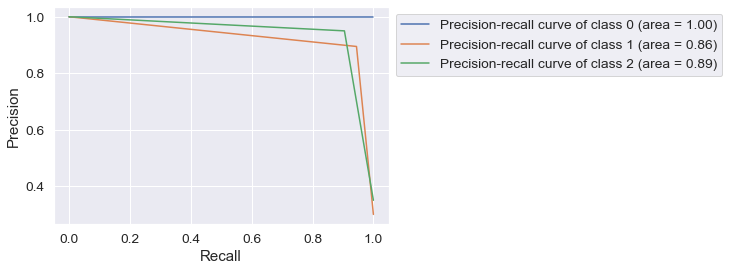

In [33]:
_,probs, y_v = decision_tree_fit(X, y, part = 0.6)

fig = plt.figure()
recall_curve(probs, y_v)
plt.legend(bbox_to_anchor =(1, 1), ncol = 1)
plt.savefig("pr_dt.png", dpi = 300, bbox_inches = 'tight')

Random Forest

<Figure size 432x288 with 0 Axes>

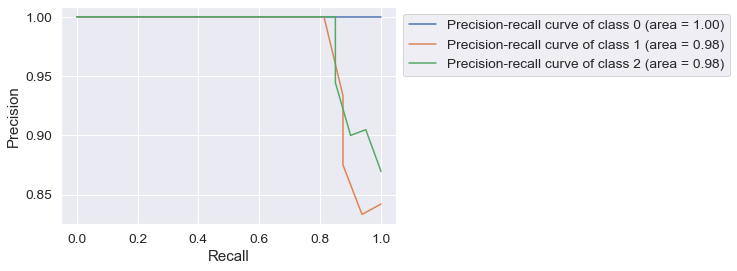

In [34]:
_,probs, y_v = fit_rf(10,X, y, part = 0.6) # 10 trees

fig = plt.figure()
recall_curve(probs, y_v)
plt.legend(bbox_to_anchor =(1, 1), ncol = 1)
plt.savefig("pr_rf.png", dpi = 300, bbox_inches = 'tight')

KNN

<Figure size 432x288 with 0 Axes>

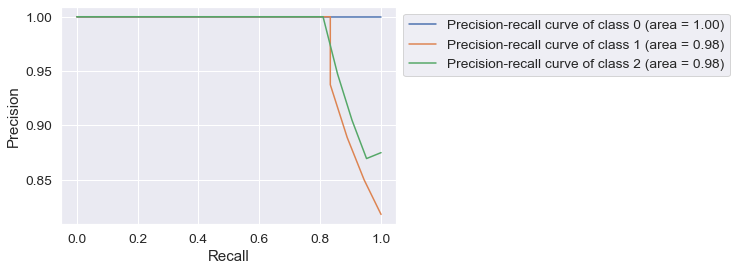

In [35]:
_,probs, y_v = fit_KNN(X, y, part = 0.6)

fig = plt.figure()
recall_curve(probs, y_v)
plt.legend(bbox_to_anchor =(1, 1), ncol = 1)
plt.savefig("pr_knn.png", dpi = 300, bbox_inches = 'tight')

### Corbes ROC

In [36]:
def ROC_curve(probs, y_v):
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
    plt.legend()

Regressor logístic

<Figure size 432x288 with 0 Axes>

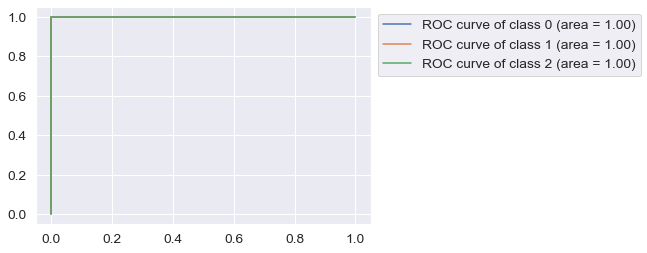

In [37]:
_,probs, y_v = fit_lr(X, y, part = 0.6)

fig = plt.figure()
ROC_curve(probs, y_v)
plt.legend(bbox_to_anchor =(1, 1), ncol = 1)
plt.savefig("roc_rl.png", dpi = 300, bbox_inches = 'tight')

SVM

<Figure size 432x288 with 0 Axes>

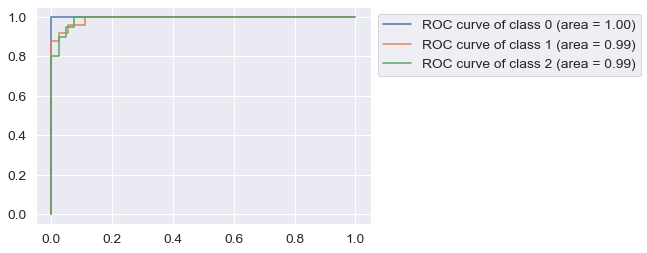

In [38]:
_,probs, y_v = fit_svm(X, y, part = 0.6)

fig = plt.figure()
ROC_curve(probs, y_v)
plt.legend(bbox_to_anchor =(1, 1), ncol = 1)
plt.savefig("roc_svm.png", dpi = 300, bbox_inches = 'tight')

Decision tree

<Figure size 432x288 with 0 Axes>

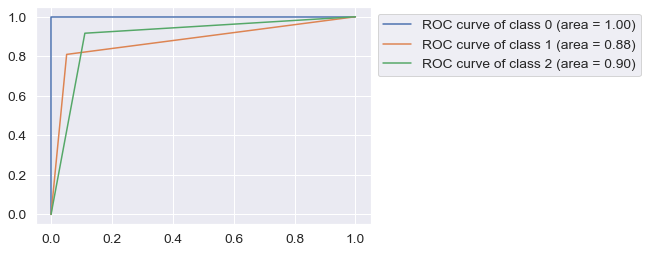

In [39]:
_,probs, y_v = decision_tree_fit(X, y, part = 0.6)

fig = plt.figure()
ROC_curve(probs, y_v)
plt.legend(bbox_to_anchor =(1, 1), ncol = 1)
plt.savefig("roc_dt.png", dpi = 300, bbox_inches = 'tight')

Random Forest 

<Figure size 432x288 with 0 Axes>

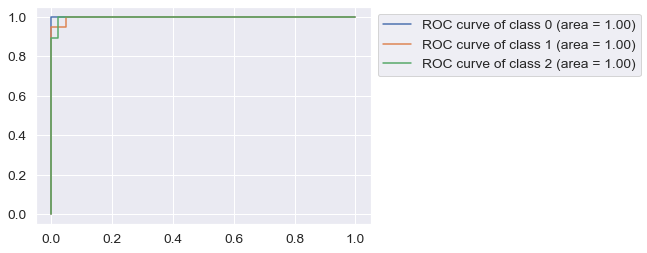

In [40]:
_,probs, y_v = fit_rf(10,X, y, part = 0.6) # 10 trees

fig = plt.figure()
ROC_curve(probs, y_v)
plt.legend(bbox_to_anchor =(1, 1), ncol = 1)
plt.savefig("roc_rf.png", dpi = 300, bbox_inches = 'tight')

KNN

<Figure size 432x288 with 0 Axes>

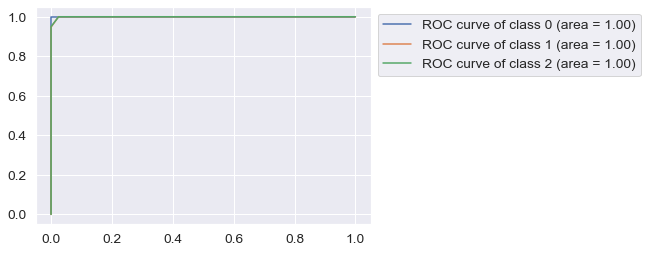

In [41]:
_,probs, y_v = fit_KNN(X, y, part = 0.6)

fig = plt.figure()
ROC_curve(probs, y_v)
plt.legend(bbox_to_anchor =(1, 1), ncol = 1)
plt.savefig("roc_knn.png", dpi = 300, bbox_inches = 'tight')